In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import statistics
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV

In [3]:
path1 = '/content/drive/MyDrive/stroke_prediction/Training_data.csv'
path2 = '/content/drive/MyDrive/stroke_prediction/Test_data.csv'
path3 = '/content/drive/MyDrive/stroke_prediction/kaggle_label.csv'

In [4]:
df_train = pd.read_csv(path1)
df_test = pd.read_csv(path2)
df_test_label = pd.read_csv(path3)

In [5]:
df_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3854,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
3855,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
3856,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
3857,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
1,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
2,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked
3,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked
4,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
1246,41512,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked
1247,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked
1248,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown
1249,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown


In [7]:
df_test_label.drop([df_test_label.columns[0]],axis=1, inplace=True)

In [8]:
df_test = pd.merge(df_test,df_test_label,on='id')

In [9]:
df_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
2,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
3,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
4,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1246,41512,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0
1247,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
1248,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
1249,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3859 entries, 0 to 3858
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3859 non-null   int64  
 1   gender             3859 non-null   object 
 2   age                3859 non-null   float64
 3   hypertension       3859 non-null   int64  
 4   heart_disease      3859 non-null   int64  
 5   ever_married       3859 non-null   object 
 6   work_type          3859 non-null   object 
 7   Residence_type     3859 non-null   object 
 8   avg_glucose_level  3859 non-null   float64
 9   bmi                3709 non-null   float64
 10  smoking_status     3859 non-null   object 
 11  stroke             3859 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 361.9+ KB


In [11]:
df_train.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  150
smoking_status         0
stroke                 0
dtype: int64

In [12]:
df_train.nunique()

id                   3859
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3179
bmi                   401
smoking_status          4
stroke                  2
dtype: int64

In [13]:
df_train.drop(['id'],axis=1,inplace=True)

In [14]:
df_train.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Boxplot

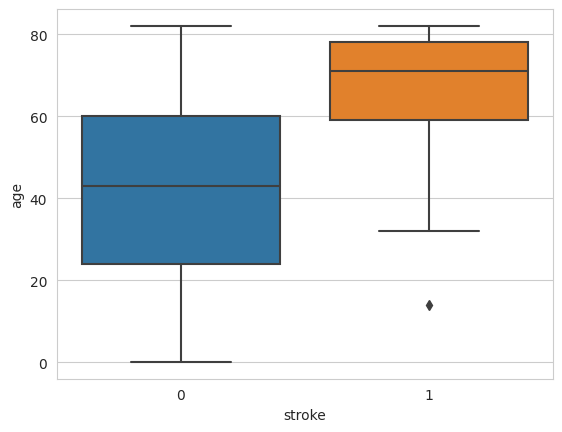

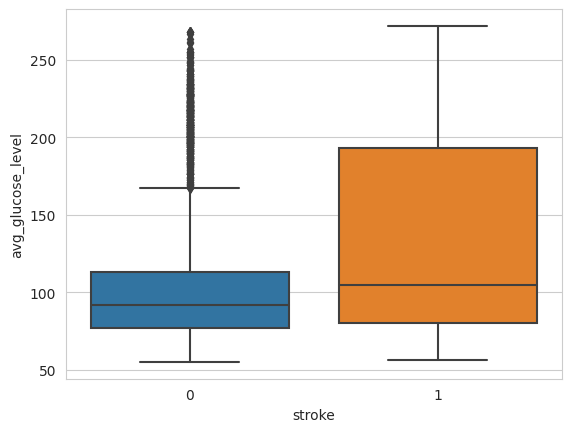

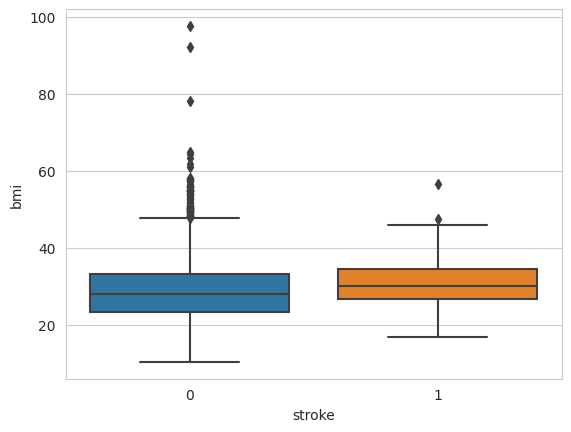

In [15]:
sns.set_style("whitegrid")
box_plt_feat = ['age','avg_glucose_level','bmi']
for i in box_plt_feat:
  sns.boxplot(x='stroke',y=i, data= df_train)
  plt.show()

Text(0, 0.5, 'Hypertension vs stroke')

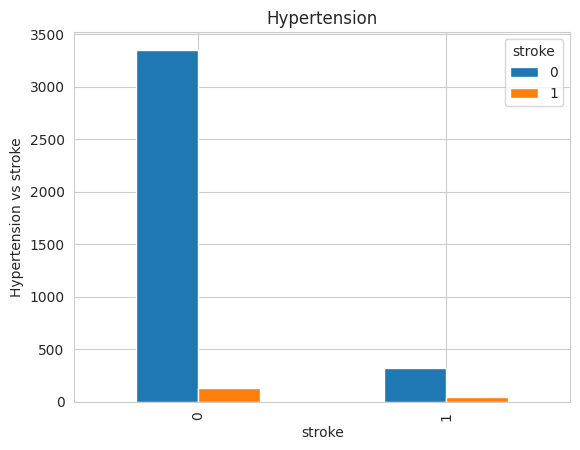

In [16]:
pd.crosstab(df_train.hypertension,df_train.stroke).plot(kind='bar')
plt.title('Hypertension')
plt.xlabel('stroke')
plt.ylabel('Hypertension vs stroke')

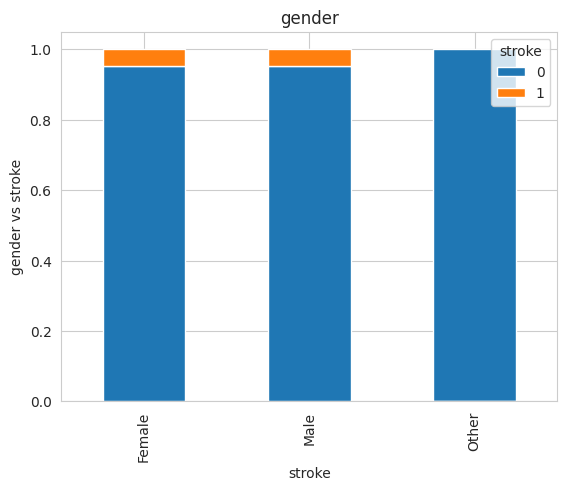

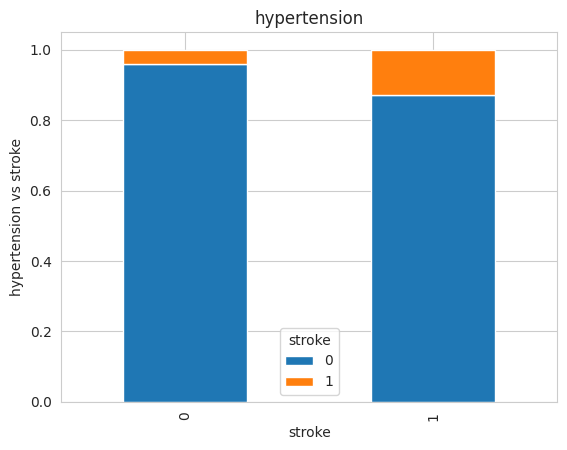

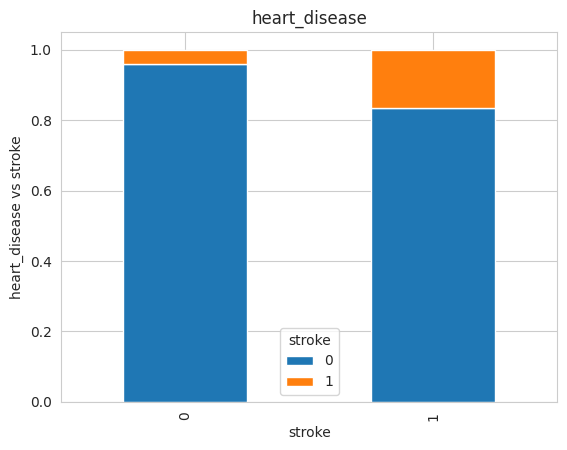

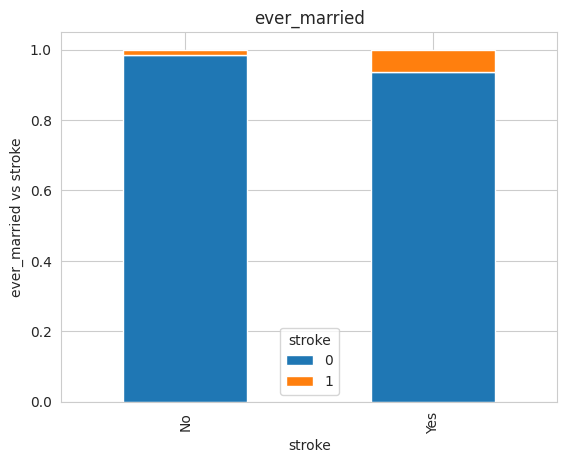

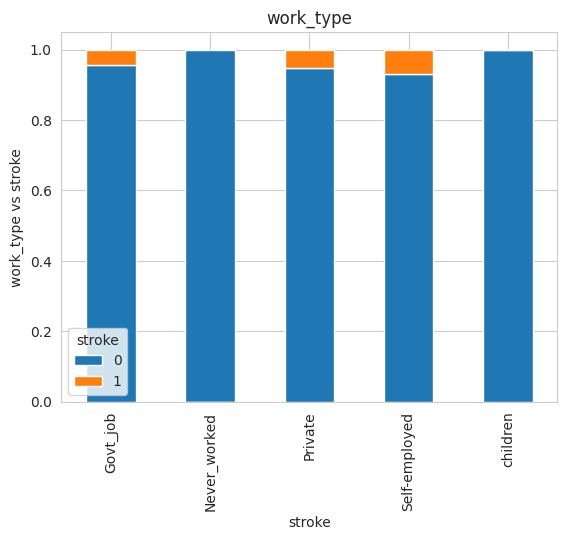

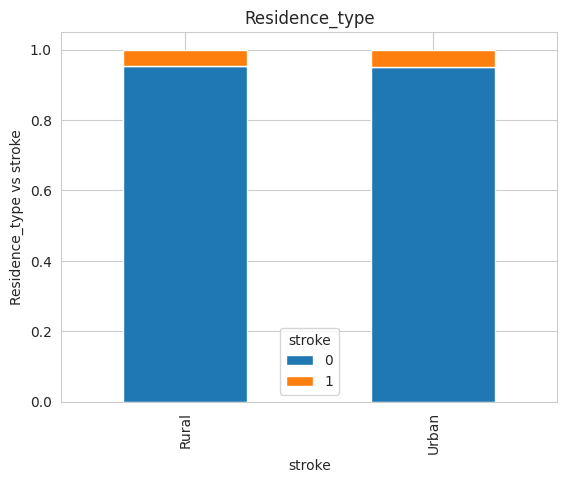

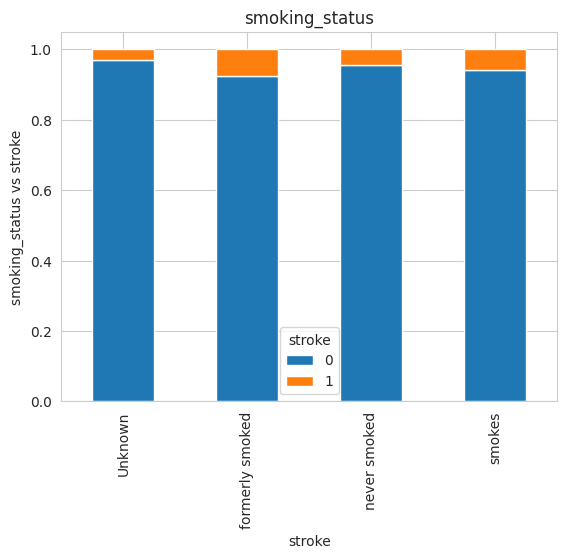

In [17]:
crosstab_list = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
for i in crosstab_list:
  table=pd.crosstab(df_train[i],df_train['stroke'])
  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
  plt.title(i)
  plt.xlabel('stroke')
  plt.ylabel('{} vs stroke'.format(i))

In [18]:
X = df_train.iloc[:,:-1]
y = df_train[['stroke']]

In [19]:
X['Residence_type'].replace('Rural',0,inplace=True)
X['Residence_type'].replace('Urban',1,inplace=True)
X['ever_married'].replace('Yes',1,inplace=True)
X['ever_married'].replace('No',0,inplace=True)
X = pd.get_dummies(data=X, columns=['gender','work_type','smoking_status'])

In [20]:
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

In [21]:
X.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

### Feature Selection Methods

In [22]:
frames = [X,y]
result = pd.concat(frames, axis=1)

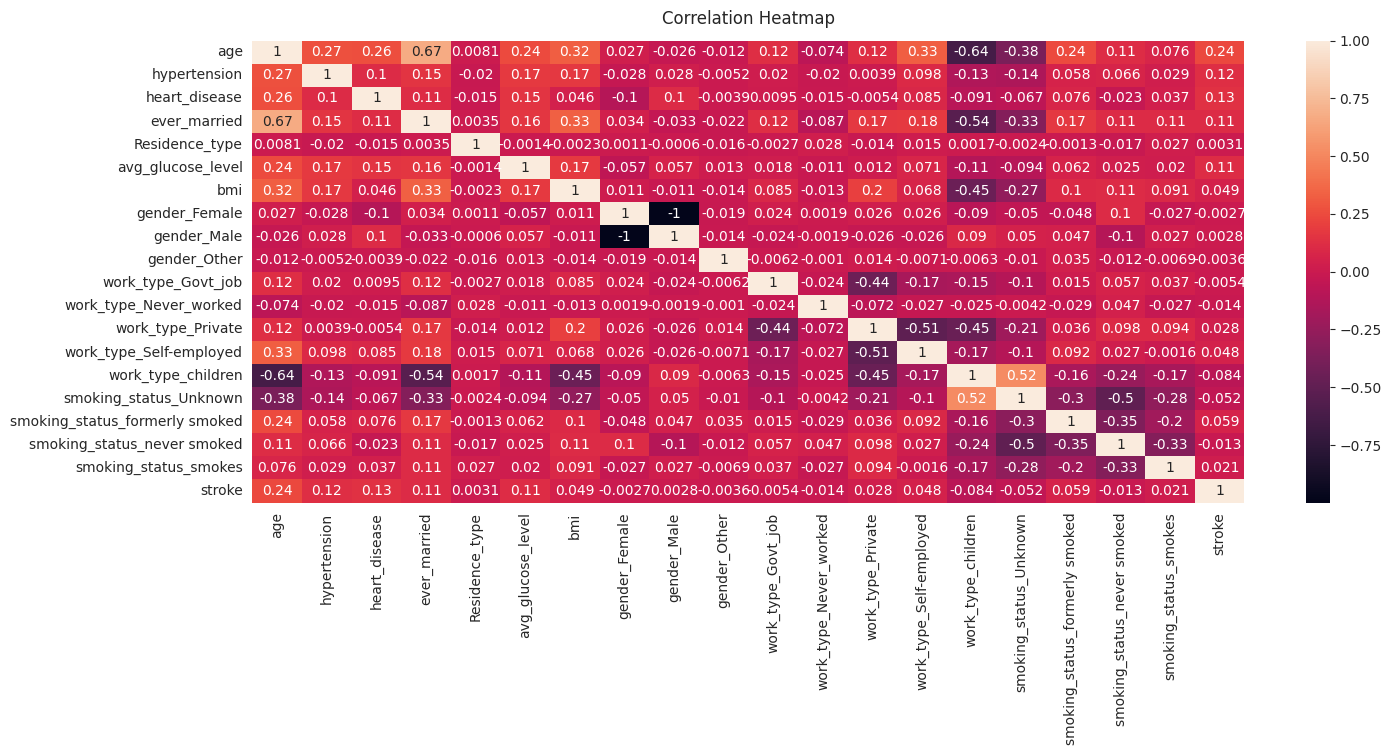

In [23]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(result.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12},pad=12);

In [24]:
pca = PCA()
pca.fit(X)

PCA()

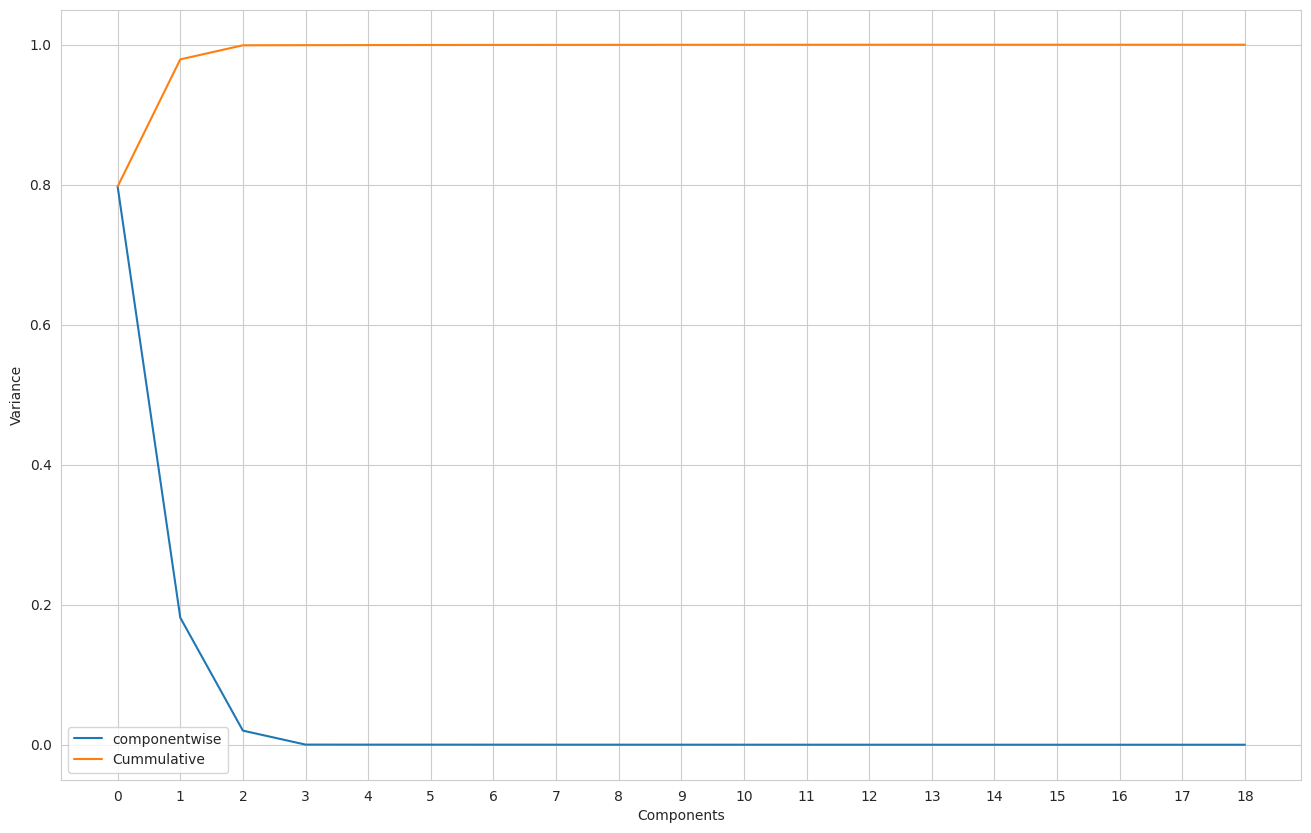

[7.97477497e-01 1.81574451e-01 2.01261304e-02 1.86674422e-04
 1.30443041e-04 1.09034517e-04 9.44021896e-05 7.25660593e-05
 6.17034605e-05 5.27144604e-05 4.41785542e-05 2.98857819e-05
 2.10604277e-05 1.73168816e-05 1.79520742e-06 1.46132801e-07
 6.57826593e-36 4.26566515e-36 1.37063992e-36]
[0.7974775  0.97905195 0.99917808 0.99936475 0.9994952  0.99960423
 0.99969863 0.9997712  0.9998329  0.99988562 0.9999298  0.99995968
 0.99998074 0.99999806 0.99999985 1.         1.         1.
 1.        ]


In [25]:
plt.figure(figsize=(16,10))
x_axis = np.arange(len(pca.explained_variance_ratio_))
y_axis = pca.explained_variance_ratio_
y_axis_cum = pca.explained_variance_ratio_.cumsum()
plt.plot(x_axis,y_axis, label='componentwise')
plt.plot(x_axis,y_axis_cum, label='Cummulative')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.xticks(x_axis)
plt.legend()
plt.show()
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

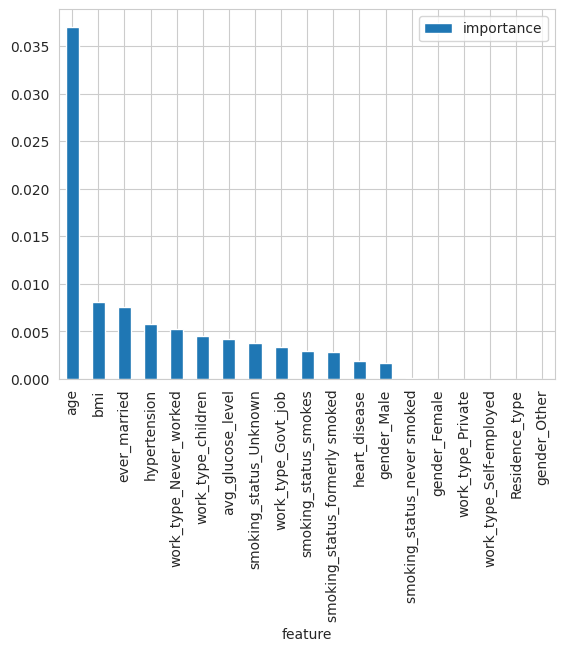

                           feature  importance
0                              age    0.037008
6                              bmi    0.008069
3                     ever_married    0.007551
1                     hypertension    0.005770
11          work_type_Never_worked    0.005248
14              work_type_children    0.004483
5                avg_glucose_level    0.004201
15          smoking_status_Unknown    0.003766
10              work_type_Govt_job    0.003327
18           smoking_status_smokes    0.002979
16  smoking_status_formerly smoked    0.002813
2                    heart_disease    0.001926
8                      gender_Male    0.001641
17     smoking_status_never smoked    0.000070
7                    gender_Female    0.000000
12               work_type_Private    0.000000
13         work_type_Self-employed    0.000000
4                   Residence_type    0.000000
9                     gender_Other    0.000000
['age' 'bmi' 'ever_married' 'hypertension' 'work_type_Never_

In [26]:
importance = mutual_info_classif(X,y,random_state=42)
feat_imp = pd.DataFrame({'feature':X.columns[0:len(X.columns[0:])], 'importance':importance})
feat_desc = feat_imp.sort_values(by=['importance'], ascending=False)
feat_desc.plot(x='feature',y='importance',kind='bar')
plt.show()
best_feats_mi = feat_desc['feature'][0:10].to_numpy()
print(feat_desc)
print(best_feats_mi)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=10)
sfs.fit(X,y['stroke'])
feat = sfs.transform(X)
print("Important 10 features: {}".format(X.columns[sfs.get_support()]))

Important 10 features: Index(['heart_disease', 'avg_glucose_level', 'gender_Female', 'gender_Other',
       'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked'],
      dtype='object')


In [28]:
best_feat_sfs = X.columns[sfs.get_support()]

In [29]:
svr_mod = SVR(kernel='linear')
rfe_selector = RFE(estimator=svr_mod, n_features_to_select=10, verbose=2)
rfe_selector.fit(X,y['stroke'])
feat = rfe_selector.transform(X)
rfe_selector.ranking_


Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


array([ 1,  6,  4,  1,  5,  7,  8,  3,  1, 10,  1,  9,  1,  1,  1,  1,  2,
        1,  1])

In [30]:
best_feat_rfe = X.columns[rfe_selector.ranking_ == 1]

                           feature    importance
5                avg_glucose_level  2.664938e-01
6                              bmi  2.393500e-01
0                              age  2.325416e-01
4                   Residence_type  3.325562e-02
1                     hypertension  2.864730e-02
2                    heart_disease  2.471319e-02
17     smoking_status_never smoked  2.009230e-02
8                      gender_Male  1.962613e-02
12               work_type_Private  1.958767e-02
7                    gender_Female  1.872698e-02
3                     ever_married  1.778765e-02
16  smoking_status_formerly smoked  1.733133e-02
18           smoking_status_smokes  1.674526e-02
13         work_type_Self-employed  1.636312e-02
15          smoking_status_Unknown  1.486866e-02
10              work_type_Govt_job  1.281276e-02
14              work_type_children  1.009645e-03
11          work_type_Never_worked  4.685189e-05
9                     gender_Other  9.066569e-08
['avg_glucose_level'

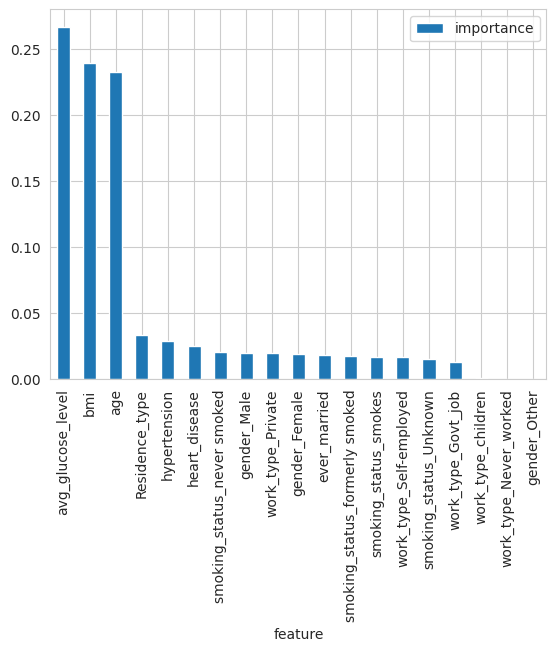

In [31]:
rf_selector = RandomForestClassifier()
rf_selector.fit(X,y['stroke'])
importances_rf = rf_selector.feature_importances_
feat_imp = pd.DataFrame({'feature':X.columns, 'importance':importances_rf})
feat_imp.set_index('importance')

feat_imp = feat_imp.sort_values('importance', ascending=False)
feat_imp.plot(x='feature',y='importance',kind='bar')
best_feats_rf = feat_imp['feature'][0:10].to_numpy()
print(feat_imp)
print(best_feats_rf)

### Model

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X,y,stratify=y,test_size=0.20)
X_train.shape, X_val.shape

((3087, 19), (772, 19))

In [33]:
model_trial = GaussianNB()
model_trial.fit(X_train,y_train)
prediction_prob = model_trial.predict_proba(X)
prediction_prob[1][1]

0.9994083853905473

In [34]:
def cal_sen_spec(cm):
  sensitivity = cm[1,1]/ (cm[1,1]+cm[1,0])
  specificity = cm[0,0] / (cm[0,0]+cm[0,1])
  hm_ss = statistics.harmonic_mean([specificity,sensitivity])
  return sensitivity, specificity, hm_ss

In [35]:
def Evaluate_model(model, X_train, X_val, y_train, y_val):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  cm = confusion_matrix(y_val, y_pred, labels=model.classes_)
  sensitivity, specificity, hm_ss = cal_sen_spec(cm)
  print("Sensitivity: {}, Specificity: {}, Harmonic_ss: {}".format(sensitivity, specificity, hm_ss))
  disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=model.classes_)
  disp.plot()
  plt.show()
  print(classification_report(y_val,y_pred))

In [36]:
model_names = ['Dummy_Classifier', 'Dummy_Classifier_uniform', 'Logistic_Regression','Naive_Bayes','KNN',
               'SVC','Decision_Tree','Random_Forest','Adaboost','Bagging','Gradient_Boosting','XGBoosting']
clf = [DummyClassifier(random_state=42),
       DummyClassifier(strategy='uniform', random_state=42),
       LogisticRegression(),
       GaussianNB(),
       KNeighborsClassifier(n_neighbors=5),
       SVC(),
       DecisionTreeClassifier(),
       RandomForestClassifier(),
       AdaBoostClassifier(),
       BaggingClassifier(),
       GradientBoostingClassifier(),
       XGBClassifier()]

For Dummy_Classifier
Sensitivity: 0.0, Specificity: 1.0, Harmonic_ss: 0.0


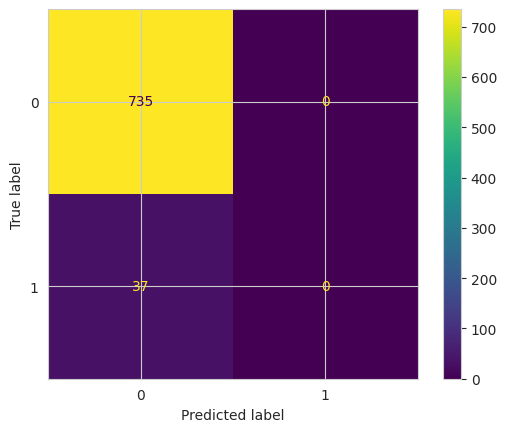

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       735
           1       0.00      0.00      0.00        37

    accuracy                           0.95       772
   macro avg       0.48      0.50      0.49       772
weighted avg       0.91      0.95      0.93       772

For Dummy_Classifier_uniform
Sensitivity: 0.5405405405405406, Specificity: 0.48027210884353744, Harmonic_ss: 0.5086272108353446


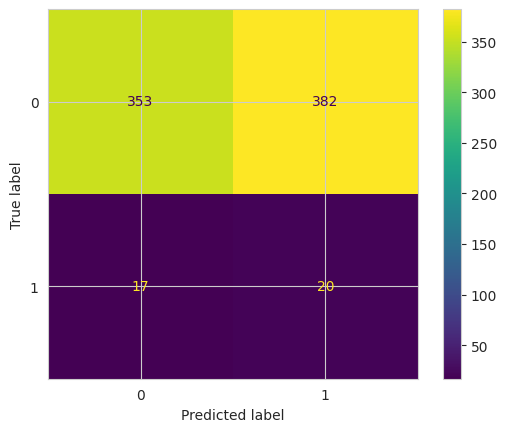

              precision    recall  f1-score   support

           0       0.95      0.48      0.64       735
           1       0.05      0.54      0.09        37

    accuracy                           0.48       772
   macro avg       0.50      0.51      0.37       772
weighted avg       0.91      0.48      0.61       772

For Logistic_Regression
Sensitivity: 0.0, Specificity: 1.0, Harmonic_ss: 0.0


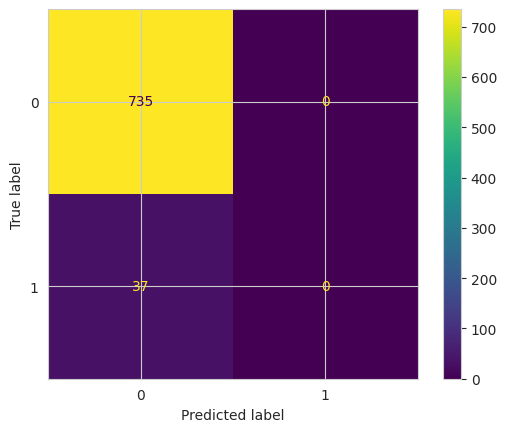

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       735
           1       0.00      0.00      0.00        37

    accuracy                           0.95       772
   macro avg       0.48      0.50      0.49       772
weighted avg       0.91      0.95      0.93       772

For Naive_Bayes
Sensitivity: 1.0, Specificity: 0.40408163265306124, Harmonic_ss: 0.5755813953488372


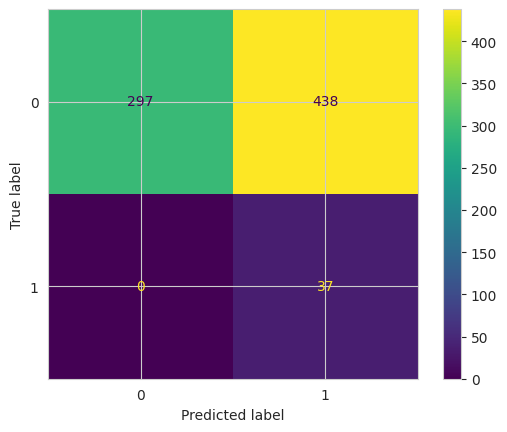

              precision    recall  f1-score   support

           0       1.00      0.40      0.58       735
           1       0.08      1.00      0.14        37

    accuracy                           0.43       772
   macro avg       0.54      0.70      0.36       772
weighted avg       0.96      0.43      0.55       772

For KNN
Sensitivity: 0.0, Specificity: 0.9959183673469387, Harmonic_ss: 0.0


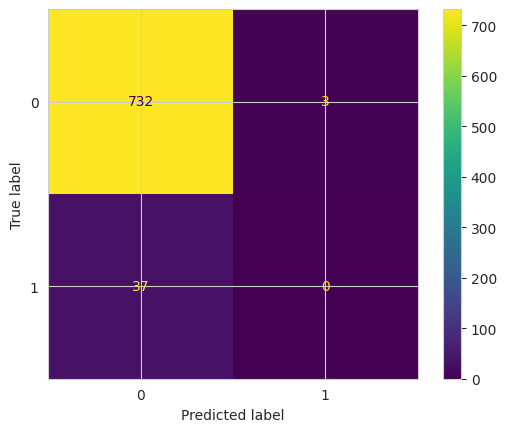

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       735
           1       0.00      0.00      0.00        37

    accuracy                           0.95       772
   macro avg       0.48      0.50      0.49       772
weighted avg       0.91      0.95      0.93       772

For SVC
Sensitivity: 0.0, Specificity: 1.0, Harmonic_ss: 0.0


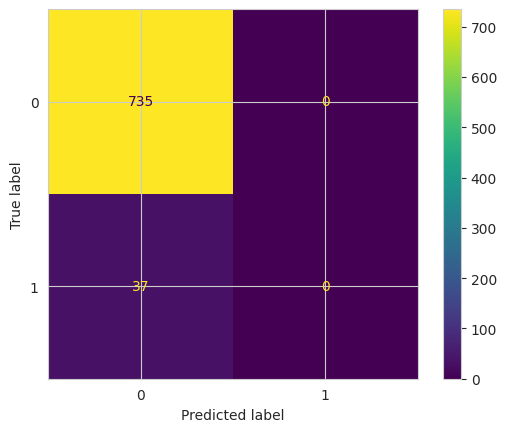

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       735
           1       0.00      0.00      0.00        37

    accuracy                           0.95       772
   macro avg       0.48      0.50      0.49       772
weighted avg       0.91      0.95      0.93       772

For Decision_Tree
Sensitivity: 0.13513513513513514, Specificity: 0.9619047619047619, Harmonic_ss: 0.23697794462693572


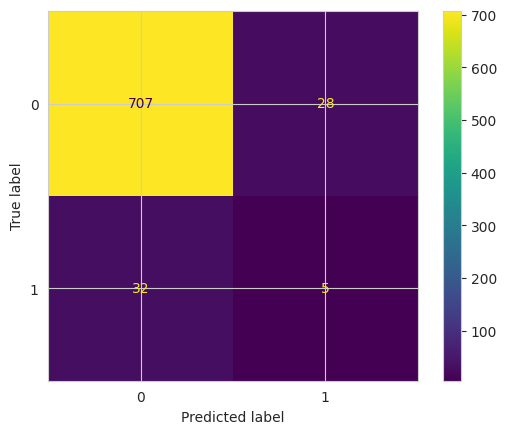

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       735
           1       0.15      0.14      0.14        37

    accuracy                           0.92       772
   macro avg       0.55      0.55      0.55       772
weighted avg       0.92      0.92      0.92       772

For Random_Forest
Sensitivity: 0.0, Specificity: 0.998639455782313, Harmonic_ss: 0.0


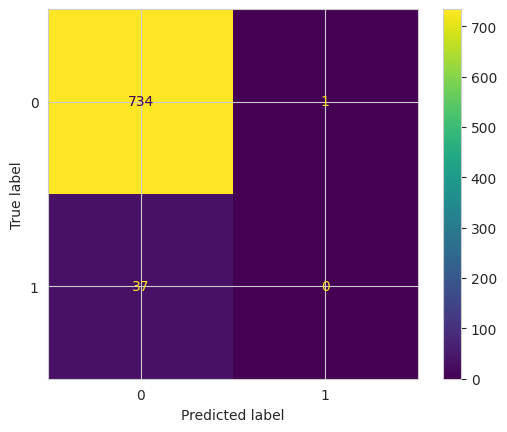

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       735
           1       0.00      0.00      0.00        37

    accuracy                           0.95       772
   macro avg       0.48      0.50      0.49       772
weighted avg       0.91      0.95      0.93       772

For Adaboost
Sensitivity: 0.0, Specificity: 1.0, Harmonic_ss: 0.0


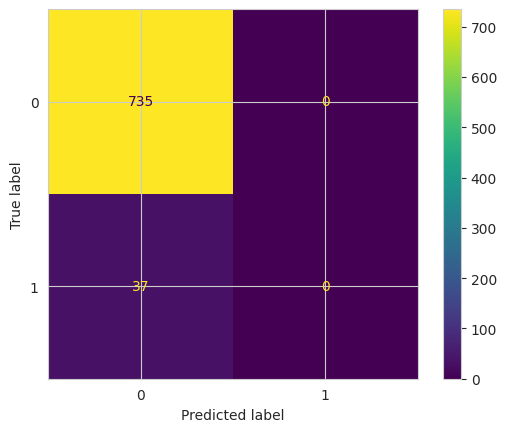

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       735
           1       0.00      0.00      0.00        37

    accuracy                           0.95       772
   macro avg       0.48      0.50      0.49       772
weighted avg       0.91      0.95      0.93       772

For Bagging
Sensitivity: 0.0, Specificity: 0.9918367346938776, Harmonic_ss: 0.0


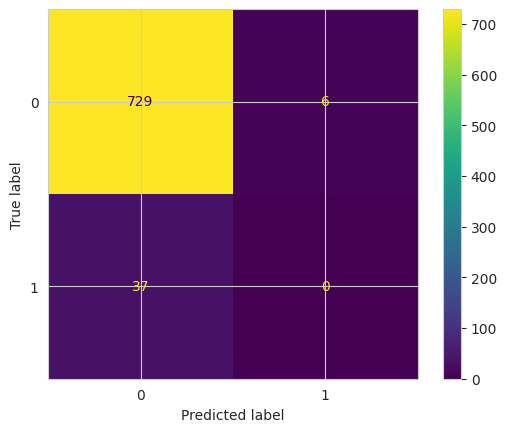

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       735
           1       0.00      0.00      0.00        37

    accuracy                           0.94       772
   macro avg       0.48      0.50      0.49       772
weighted avg       0.91      0.94      0.92       772

For Gradient_Boosting
Sensitivity: 0.0, Specificity: 0.998639455782313, Harmonic_ss: 0.0


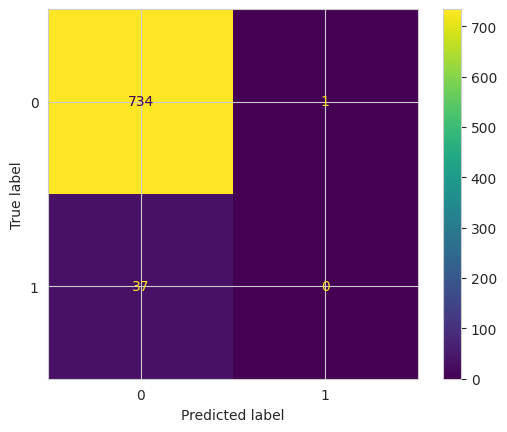

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       735
           1       0.00      0.00      0.00        37

    accuracy                           0.95       772
   macro avg       0.48      0.50      0.49       772
weighted avg       0.91      0.95      0.93       772

For XGBoosting
Sensitivity: 0.02702702702702703, Specificity: 0.9891156462585035, Harmonic_ss: 0.05261634218716074


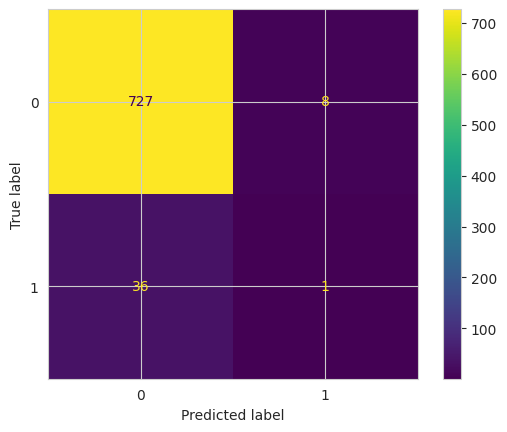

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       735
           1       0.11      0.03      0.04        37

    accuracy                           0.94       772
   macro avg       0.53      0.51      0.51       772
weighted avg       0.91      0.94      0.93       772



In [38]:
for i in range(len(model_names)):
  print("For {}".format(model_names[i]))
  Evaluate_model(clf[i],X_train, X_val, y_train, y_val)

In [ ]:
# def model_eval(clf, X,y):
#   cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
#   f1score =  cross_val_score(clf,X, y, scoring='aucpr',verbose=0,cv=cv)
#   mean_f1score = f1score.mean()
#   return mean_f1score

In [ ]:
# f1_score_list_without = []
# for i in range(len(model_names)):
#   model_f1 = model_eval(clf[i],X_train,y_train)
#   print("Model: {} -> F1 score: {}".format(model_names[i], model_f1))
#   f1_score_list_without.append(model_f1)

In [ ]:
# best_model_name_without = model_names[np.argmax(f1_score_list_without)]
# best_clf_without = clf[np.argmax(f1_score_list_without)]
# print("Best_model without balancing : {} with f1 score: {} ".format(best_model_name_without, np.max(f1_score_list_without)))

In [39]:
X_under,y_under = TomekLinks().fit_resample(X_train,y_train)
X_over,y_over = SMOTE().fit_resample(X_train,y_train)
X_comb,y_comb = SMOTETomek().fit_resample(X_train,y_train)

In [ ]:
# f1_score_list_over = []
# for i in range(len(model_names)):
#   model_f1 = model_eval(clf[i],X_over,y_over)
#   print("Model: {} -> F1 score: {}".format(model_names[i], model_f1))
#   f1_score_list_over.append(model_f1)

In [ ]:
# best_model_name_over = model_names[np.argmax(f1_score_list_over)]
# best_clf_over = clf[np.argmax(f1_score_list_over)]
# print("Best_model with oversampling : {} with f1 score: {} ".format(best_model_name_over, np.max(f1_score_list)))

For Gaussian Naive Bayes
Sensitivity: 1.0, Specificity: 0.40408163265306124, Harmonic_ss: 0.5755813953488372


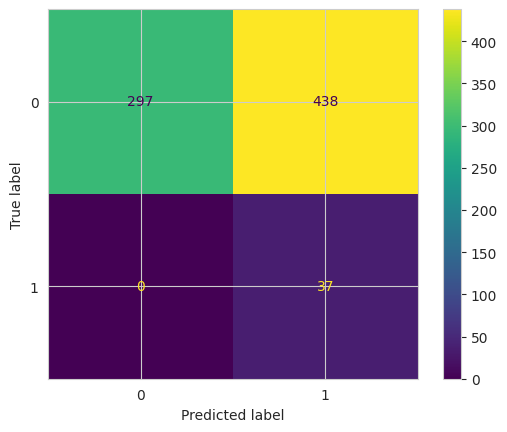

              precision    recall  f1-score   support

           0       1.00      0.40      0.58       735
           1       0.08      1.00      0.14        37

    accuracy                           0.43       772
   macro avg       0.54      0.70      0.36       772
weighted avg       0.96      0.43      0.55       772



In [50]:
print("For Gaussian Naive Bayes")
Evaluate_model(GaussianNB(),X_train, X_val, y_train, y_val)

For Gaussian Naive Bayes with best feat using mi
Sensitivity: 0.972972972972973, Specificity: 0.507482993197279, Harmonic_ss: 0.6670475149648544


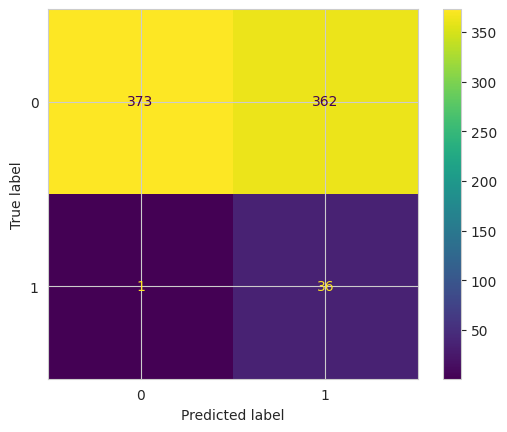

              precision    recall  f1-score   support

           0       1.00      0.51      0.67       735
           1       0.09      0.97      0.17        37

    accuracy                           0.53       772
   macro avg       0.54      0.74      0.42       772
weighted avg       0.95      0.53      0.65       772



In [51]:
print("For Gaussian Naive Bayes with best feat using mi")
Evaluate_model(GaussianNB(),X_train[best_feats_mi], X_val[best_feats_mi], y_train, y_val)

For Gaussian Naive Bayes with best feat using SFS
Sensitivity: 1.0, Specificity: 0.15374149659863945, Harmonic_ss: 0.2665094339622641


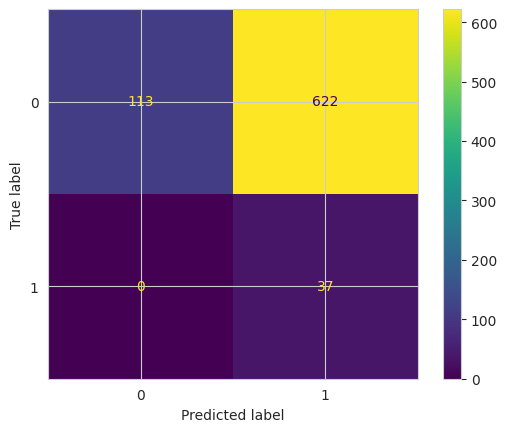

              precision    recall  f1-score   support

           0       1.00      0.15      0.27       735
           1       0.06      1.00      0.11        37

    accuracy                           0.19       772
   macro avg       0.53      0.58      0.19       772
weighted avg       0.95      0.19      0.26       772



In [52]:
print("For Gaussian Naive Bayes with best feat using SFS")
Evaluate_model(GaussianNB(),X_train[best_feat_sfs], X_val[best_feat_sfs], y_train, y_val)

For Gaussian Naive Bayes with best feat using RFE
Sensitivity: 0.4594594594594595, Specificity: 0.8299319727891157, Harmonic_ss: 0.591472978753743


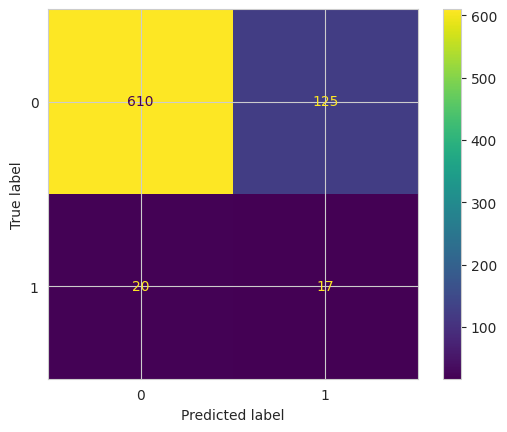

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       735
           1       0.12      0.46      0.19        37

    accuracy                           0.81       772
   macro avg       0.54      0.64      0.54       772
weighted avg       0.93      0.81      0.86       772



In [53]:
print("For Gaussian Naive Bayes with best feat using RFE")
Evaluate_model(GaussianNB(),X_train[best_feat_rfe], X_val[best_feat_rfe], y_train, y_val)

For Gaussian Naive Bayes with best feat using RF
Sensitivity: 0.972972972972973, Specificity: 0.507482993197279, Harmonic_ss: 0.6670475149648544


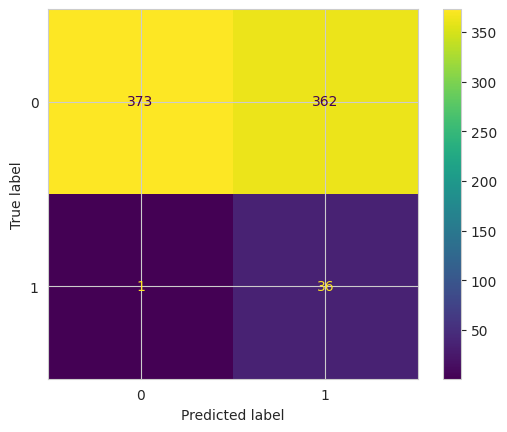

              precision    recall  f1-score   support

           0       1.00      0.51      0.67       735
           1       0.09      0.97      0.17        37

    accuracy                           0.53       772
   macro avg       0.54      0.74      0.42       772
weighted avg       0.95      0.53      0.65       772



In [54]:
print("For Gaussian Naive Bayes with best feat using RF")
Evaluate_model(GaussianNB(),X_train[best_feats_mi], X_val[best_feats_mi], y_train, y_val)

For Gaussian Naive Bayes using RFE and OVER
Sensitivity: 1.0, Specificity: 0.4013605442176871, Harmonic_ss: 0.5728155339805825


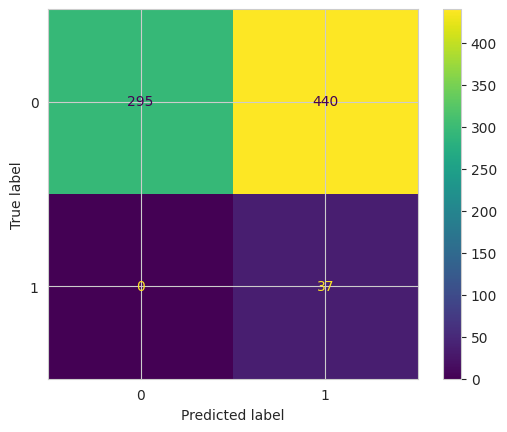

              precision    recall  f1-score   support

           0       1.00      0.40      0.57       735
           1       0.08      1.00      0.14        37

    accuracy                           0.43       772
   macro avg       0.54      0.70      0.36       772
weighted avg       0.96      0.43      0.55       772



In [55]:
print("For Gaussian Naive Bayes using RFE and OVER")
Evaluate_model(GaussianNB(),X_over[best_feats_mi], X_val[best_feats_mi], y_over, y_val)

For Gaussian Naive Bayes USING RFE and Under
Sensitivity: 0.972972972972973, Specificity: 0.5020408163265306, Harmonic_ss: 0.6623289207987436


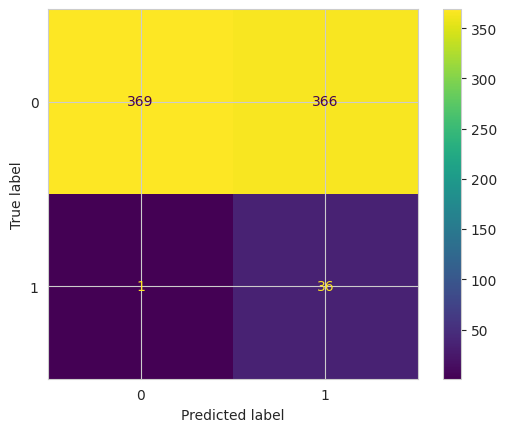

              precision    recall  f1-score   support

           0       1.00      0.50      0.67       735
           1       0.09      0.97      0.16        37

    accuracy                           0.52       772
   macro avg       0.54      0.74      0.42       772
weighted avg       0.95      0.52      0.64       772



In [56]:
print("For Gaussian Naive Bayes USING RFE and Under")
Evaluate_model(GaussianNB(),X_under[best_feats_mi], X_val[best_feats_mi], y_under, y_val)

For Gaussian Naive Bayes using RFE and Combined
Sensitivity: 1.0, Specificity: 0.3986394557823129, Harmonic_ss: 0.5700389105058365


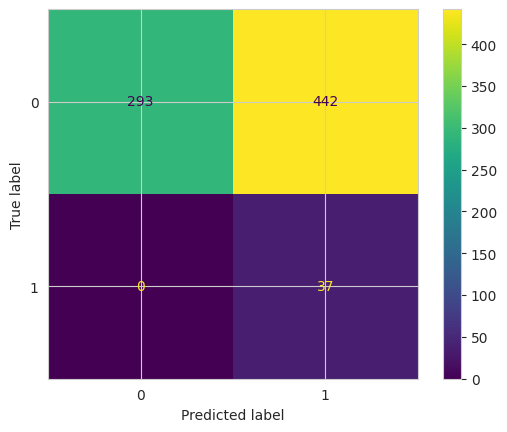

              precision    recall  f1-score   support

           0       1.00      0.40      0.57       735
           1       0.08      1.00      0.14        37

    accuracy                           0.43       772
   macro avg       0.54      0.70      0.36       772
weighted avg       0.96      0.43      0.55       772



In [57]:
print("For Gaussian Naive Bayes using RFE and Combined")
Evaluate_model(GaussianNB(),X_comb[best_feats_mi], X_val[best_feats_mi], y_comb, y_val)

### Best model is a result of Naive Bayes using RFE and Undersampling

For Gaussian Naive Bayes USING RFE and Under
Sensitivity: 0.972972972972973, Specificity: 0.5020408163265306, Harmonic_ss: 0.6623289207987436


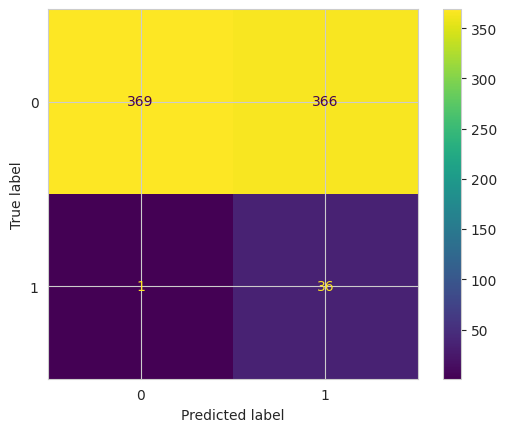

              precision    recall  f1-score   support

           0       1.00      0.50      0.67       735
           1       0.09      0.97      0.16        37

    accuracy                           0.52       772
   macro avg       0.54      0.74      0.42       772
weighted avg       0.95      0.52      0.64       772



In [58]:
print("For Gaussian Naive Bayes USING RFE and Under")
Evaluate_model(GaussianNB(),X_under[best_feats_mi], X_val[best_feats_mi], y_under, y_val)